In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

In [4]:
od.version()

'0.1.22'

In [5]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-3/data'

In [6]:
od.download(dataset_url)

Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu-course-c-3" (use force=True to force download)


In [7]:
import os

In [8]:
data_dir = './bank-customer-churn-prediction-dlu-course-c-3'

In [9]:
os.listdir(data_dir)

['train.csv', 'sample_submission.csv', 'test.csv']

In [10]:
train_csv = data_dir + '/train.csv'
test_csv =  data_dir + '/test.csv'
sample_submission_csv = data_dir + '/sample_submission.csv'


In [11]:
import pandas as pd

In [12]:
# оберіть опцію, яка вам зручніша
raw_df = pd.read_csv(train_csv)
#raw_df = pd.read_csv('weatherAUS.csv')

In [13]:
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [14]:
del raw_df['CustomerId']

In [15]:
print(raw_df.nunique(),raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   Surname          15000 non-null  object 
 2   CreditScore      15000 non-null  float64
 3   Geography        15000 non-null  object 
 4   Gender           15000 non-null  object 
 5   Age              15000 non-null  float64
 6   Tenure           15000 non-null  float64
 7   Balance          15000 non-null  float64
 8   NumOfProducts    15000 non-null  float64
 9   HasCrCard        15000 non-null  float64
 10  IsActiveMember   15000 non-null  float64
 11  EstimatedSalary  15000 non-null  float64
 12  Exited           15000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.5+ MB
id                 15000
Surname              764
CreditScore          378
Geography              3
Gender                 2
Age           

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_df, val_df = train_test_split(raw_df,
                                    test_size=0.2,
                                    #random_state=42,
                                    stratify=raw_df['Exited'])

In [18]:
print(val_df.shape, train_df.shape)

(3000, 13) (12000, 13)


In [19]:
print(train_df['Exited'].value_counts(normalize=True))
print(val_df['Exited'].value_counts(normalize=True))

Exited
0.0    0.7965
1.0    0.2035
Name: proportion, dtype: float64
Exited
0.0    0.796667
1.0    0.203333
Name: proportion, dtype: float64


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [20]:
input_cols = list(train_df.columns)[:-1]
target_col = 'Exited'

In [21]:
print(input_cols)

['id', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [22]:
target_col

'Exited'

In [23]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [24]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [25]:
import numpy as np

In [26]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [27]:
numeric_cols, categorical_cols

(['id',
  'CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Surname', 'Geography', 'Gender'])

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [28]:
for col in train_inputs.columns:
    print(f"--- Значення для стовпця: {col} ---", train_inputs[col].nunique())
    print(train_inputs[col].value_counts().head(11))
    print("\n")

--- Значення для стовпця: id --- 12000
id
2721     1
11043    1
3843     1
5739     1
6189     1
855      1
318      1
14547    1
11160    1
7396     1
8715     1
Name: count, dtype: int64


--- Значення для стовпця: Surname --- 735
Surname
Ch'iu      202
Ch'ien     193
Ch'ang     178
Hsia       162
T'ien      151
Hsueh      135
Hs?        134
Ch'in      130
Maclean    118
Chiang     116
Kao        116
Name: count, dtype: int64


--- Значення для стовпця: CreditScore --- 376
CreditScore
678.0    201
850.0    166
684.0    158
683.0    148
705.0    138
651.0    137
682.0    136
667.0    133
679.0    129
637.0    124
706.0    121
Name: count, dtype: int64


--- Значення для стовпця: Geography --- 3
Geography
France     7238
Spain      2623
Germany    2139
Name: count, dtype: int64


--- Значення для стовпця: Gender --- 2
Gender
Male      6792
Female    5208
Name: count, dtype: int64


--- Значення для стовпця: Age --- 56
Age
35.0    732
37.0    674
34.0    670
38.0    663
36.0    655
33.0

Категоризуємо стовпець Age

In [29]:
def age_cat(years):
    if years <= 30:
        return '0-30'
    elif years > 30 and years <= 33:
        return '30-33'
    elif years > 33 and years <= 37:
        return '34-37'
    elif years > 37 and years <= 40:
        return '37-40'
    elif years > 40 and years <= 47:
        return '40-47'
    elif years > 47:
        return '47+'

In [30]:
train_inputs['Age_CATEGORY'] = train_inputs['Age'].apply(age_cat)
val_inputs['Age_CATEGORY'] = val_inputs['Age'].apply(age_cat)

Категоризуємо стовпчик NumOfProducts, який приймає 4 значення. Бінарні стовпчики HasCrCard, IsActiveMember зі значеннями 0, 1 не категоризуємо, щоб, в кінцевому рахунку, позбавитись мультиколінеарності. В стовпчику Tenure $-$ є відношення порядку (кількість років, які клієнт обслуговується в банку), тому я його не категоризую



In [31]:
train_inputs['NumOfProducts'] = train_inputs['NumOfProducts'].astype('category')
val_inputs['NumOfProducts'] = val_inputs['NumOfProducts'].astype('category')

In [32]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'category']).columns.tolist()
print(numeric_cols, categorical_cols)

['id', 'CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'] ['Surname', 'Geography', 'Gender', 'NumOfProducts', 'Age_CATEGORY']


In [33]:
train_inputs['Age_CATEGORY'].value_counts()

,count
Age_CATEGORY,
34-37,2731
40-47,2300
0-30,2018
37-40,1842
30-33,1789
47+,1320


In [34]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 4318 to 6007
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               12000 non-null  int64   
 1   Surname          12000 non-null  object  
 2   CreditScore      12000 non-null  float64 
 3   Geography        12000 non-null  object  
 4   Gender           12000 non-null  object  
 5   Age              12000 non-null  float64 
 6   Tenure           12000 non-null  float64 
 7   Balance          12000 non-null  float64 
 8   NumOfProducts    12000 non-null  category
 9   HasCrCard        12000 non-null  float64 
 10  IsActiveMember   12000 non-null  float64 
 11  EstimatedSalary  12000 non-null  float64 
 12  Age_CATEGORY     12000 non-null  object  
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 1.2+ MB


In [35]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'category']).columns.tolist()

In [36]:
numeric_cols

['id',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [37]:
categorical_cols

['Surname', 'Geography', 'Gender', 'NumOfProducts', 'Age_CATEGORY']

In [38]:
train_inputs[categorical_cols].isna().sum()

,0
Surname,0
Geography,0
Gender,0
NumOfProducts,0
Age_CATEGORY,0


In [39]:
train_inputs[numeric_cols].isna().sum()

,0
id,0
CreditScore,0
Age,0
Tenure,0
Balance,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Пайплайн для категоріальних. Оскільки всі елементи категориальних ознак заповнені, то нам залишається лише їх закодувати (Призвища не кодуємо, оскільки цей стовпець беззмістовний і не буде приймати участі в моделюванні)

In [40]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [41]:
categorical_cols.remove('Surname')
categorical_cols

['Geography', 'Gender', 'NumOfProducts', 'Age_CATEGORY']

In [42]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [43]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([1., 2., 3., 4.]),
 array(['0-30', '30-33', '34-37', '37-40', '40-47', '47+'], dtype=object)]

In [44]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'NumOfProducts_1.0', 'NumOfProducts_2.0', 'NumOfProducts_3.0', 'NumOfProducts_4.0', 'Age_CATEGORY_0-30', 'Age_CATEGORY_30-33', 'Age_CATEGORY_34-37', 'Age_CATEGORY_37-40', 'Age_CATEGORY_40-47', 'Age_CATEGORY_47+']


In [45]:
encoder.transform(train_inputs[categorical_cols])[:10]

array([[1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [46]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [47]:
pd.set_option('display.max_columns', None)
train_inputs

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CATEGORY,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,Age_CATEGORY_0-30,Age_CATEGORY_30-33,Age_CATEGORY_34-37,Age_CATEGORY_37-40,Age_CATEGORY_40-47,Age_CATEGORY_47+
4318,4318,Hsia,675.0,France,Male,40.0,2.0,0.00,1.0,1.0,1.0,162523.66,37-40,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6010,6010,Lucciano,605.0,Spain,Male,44.0,4.0,0.00,2.0,1.0,0.0,85890.75,40-47,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10417,10417,Yobanna,667.0,France,Male,31.0,1.0,0.00,1.0,1.0,1.0,116977.89,30-33,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9193,9193,Calabresi,751.0,France,Female,36.0,8.0,0.00,2.0,0.0,1.0,180800.42,34-37,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14384,14384,Hsueh,711.0,France,Female,33.0,6.0,0.00,2.0,1.0,0.0,155786.39,30-33,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8624,8624,Curnow,646.0,France,Male,25.0,9.0,0.00,2.0,1.0,0.0,54869.54,0-30,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12884,12884,Chidiebere,623.0,Spain,Male,29.0,9.0,0.00,2.0,1.0,1.0,5983.80,0-30,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14654,14654,Kaur,681.0,Spain,Male,42.0,9.0,0.00,2.0,1.0,1.0,82996.47,40-47,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13404,13404,Mancini,697.0,Spain,Male,38.0,7.0,0.00,2.0,1.0,1.0,93881.75,37-40,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
train_inputs

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CATEGORY,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,Age_CATEGORY_0-30,Age_CATEGORY_30-33,Age_CATEGORY_34-37,Age_CATEGORY_37-40,Age_CATEGORY_40-47,Age_CATEGORY_47+
4318,4318,Hsia,675.0,France,Male,40.0,2.0,0.00,1.0,1.0,1.0,162523.66,37-40,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6010,6010,Lucciano,605.0,Spain,Male,44.0,4.0,0.00,2.0,1.0,0.0,85890.75,40-47,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10417,10417,Yobanna,667.0,France,Male,31.0,1.0,0.00,1.0,1.0,1.0,116977.89,30-33,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9193,9193,Calabresi,751.0,France,Female,36.0,8.0,0.00,2.0,0.0,1.0,180800.42,34-37,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14384,14384,Hsueh,711.0,France,Female,33.0,6.0,0.00,2.0,1.0,0.0,155786.39,30-33,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8624,8624,Curnow,646.0,France,Male,25.0,9.0,0.00,2.0,1.0,0.0,54869.54,0-30,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12884,12884,Chidiebere,623.0,Spain,Male,29.0,9.0,0.00,2.0,1.0,1.0,5983.80,0-30,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14654,14654,Kaur,681.0,Spain,Male,42.0,9.0,0.00,2.0,1.0,1.0,82996.47,40-47,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13404,13404,Mancini,697.0,Spain,Male,38.0,7.0,0.00,2.0,1.0,1.0,93881.75,37-40,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Давайте переглянемо деяку статистику для числових стовпців.

In [49]:
train_inputs[numeric_cols].describe().round(2)

,id,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,7509.94,659.48,37.71,5.04,42821.36,0.79,0.49,117763.20
std,4323.72,72.20,8.17,2.77,59790.05,0.41,0.50,45749.90
min,0.00,431.00,18.00,0.00,0.00,0.00,0.00,11.58
25%,3769.75,604.00,32.00,3.00,0.00,1.00,0.00,83058.14
50%,7513.00,662.00,37.00,5.00,0.00,1.00,0.00,123587.83
75%,11253.25,709.00,42.00,7.00,109733.20,1.00,1.00,156774.94
max,14999.00,850.00,74.00,10.00,209767.31,1.00,1.00,199992.48


Масштабуємо числові ознаки, щоб забезпечити коректну роботу моделей, чутливих до масштабу

<Axes: >

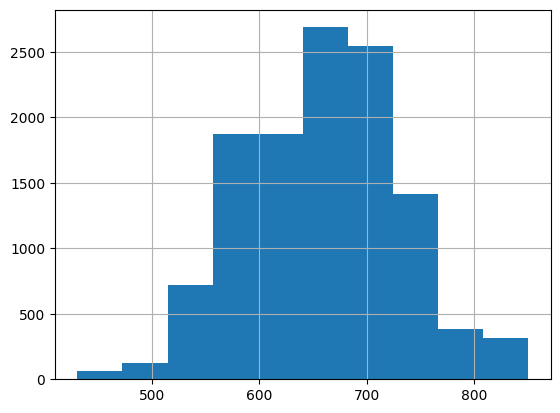

In [50]:
train_inputs['CreditScore'].hist()

CreditScore має нормальний або близький до нормального розподіл. Мінімальні та максимальні значення адекватні (в межах 350-850 — стандарт для кредитного скору). Застосуємо StandardScaler

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler_CreditScore = StandardScaler()

In [53]:
scaler_CreditScore.fit(train_inputs[['CreditScore']])

StandardScaler()

In [54]:
train_inputs[['CreditScore']] = scaler_CreditScore.transform(train_inputs[['CreditScore']])
val_inputs[['CreditScore']] = scaler_CreditScore.transform(val_inputs[['CreditScore']])

In [55]:
train_inputs[numeric_cols].describe().round(2)

,id,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,7509.94,0.00,37.71,5.04,42821.36,0.79,0.49,117763.20
std,4323.72,1.00,8.17,2.77,59790.05,0.41,0.50,45749.90
min,0.00,-3.16,18.00,0.00,0.00,0.00,0.00,11.58
25%,3769.75,-0.77,32.00,3.00,0.00,1.00,0.00,83058.14
50%,7513.00,0.03,37.00,5.00,0.00,1.00,0.00,123587.83
75%,11253.25,0.69,42.00,7.00,109733.20,1.00,1.00,156774.94
max,14999.00,2.64,74.00,10.00,209767.31,1.00,1.00,199992.48


<Axes: >

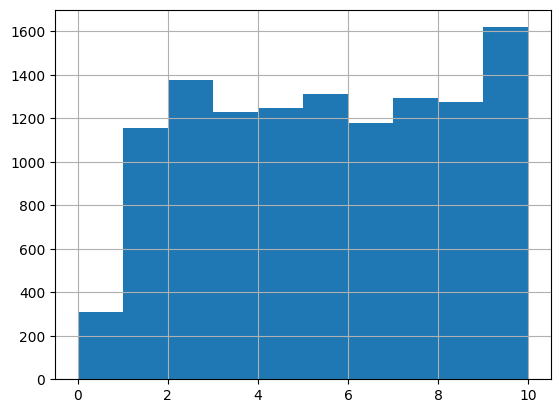

In [56]:
train_inputs['Tenure'].hist()

Стовпець Tenure вже достатньо масштабований, проте можемо використати MinMaxScaler

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler_Tenure = MinMaxScaler()
scaler_Tenure.fit(train_inputs[['Tenure']])
train_inputs[['Tenure']] = scaler_Tenure.transform(train_inputs[['Tenure']])
val_inputs[['Tenure']] = scaler_Tenure.transform(val_inputs[['Tenure']])

In [59]:
train_inputs[numeric_cols].describe().round(2)

,id,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,7509.94,0.00,37.71,0.50,42821.36,0.79,0.49,117763.20
std,4323.72,1.00,8.17,0.28,59790.05,0.41,0.50,45749.90
min,0.00,-3.16,18.00,0.00,0.00,0.00,0.00,11.58
25%,3769.75,-0.77,32.00,0.30,0.00,1.00,0.00,83058.14
50%,7513.00,0.03,37.00,0.50,0.00,1.00,0.00,123587.83
75%,11253.25,0.69,42.00,0.70,109733.20,1.00,1.00,156774.94
max,14999.00,2.64,74.00,1.00,209767.31,1.00,1.00,199992.48


<Axes: >

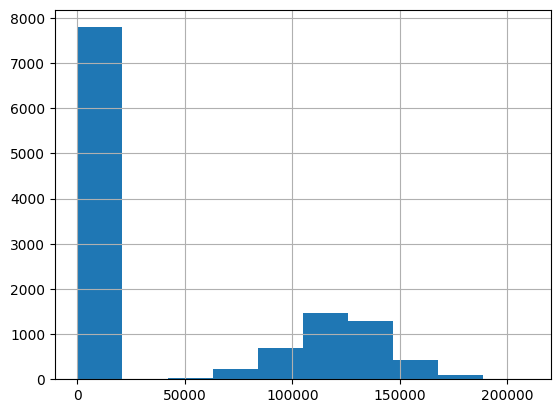

In [60]:
train_inputs['Balance'].hist()

In [61]:
train_inputs[train_inputs['Balance'] > 0].shape

(4212, 28)

Стандартний StandardScaler НЕ підходить напряму, бо він припускає приблизно нормальний розподіл, а у нас $-$ сильно скошений. RobustScaler масштабує дані з урахуванням медіани та міжквартильного діапазону, менш чутливий до викидів.

In [62]:
from sklearn.preprocessing import RobustScaler

scaler_Balance = RobustScaler()
scaler_Balance.fit(train_inputs[['Balance']])
train_inputs[['Balance']] = scaler_Balance.transform(train_inputs[['Balance']])
val_inputs[['Balance']] = scaler_Balance.transform(val_inputs[['Balance']])

In [63]:
train_inputs

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CATEGORY,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,Age_CATEGORY_0-30,Age_CATEGORY_30-33,Age_CATEGORY_34-37,Age_CATEGORY_37-40,Age_CATEGORY_40-47,Age_CATEGORY_47+
4318,4318,Hsia,0.214950,France,Male,40.0,0.2,0.000000,1.0,1.0,1.0,162523.66,37-40,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6010,6010,Lucciano,-0.754567,Spain,Male,44.0,0.4,0.000000,2.0,1.0,0.0,85890.75,40-47,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10417,10417,Yobanna,0.104148,France,Male,31.0,0.1,0.000000,1.0,1.0,1.0,116977.89,30-33,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9193,9193,Calabresi,1.267569,France,Female,36.0,0.8,0.000000,2.0,0.0,1.0,180800.42,34-37,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14384,14384,Hsueh,0.713559,France,Female,33.0,0.6,0.000000,2.0,1.0,0.0,155786.39,30-33,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8624,8624,Curnow,-0.186707,France,Male,25.0,0.9,0.000000,2.0,1.0,0.0,54869.54,0-30,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12884,12884,Chidiebere,-0.505263,Spain,Male,29.0,0.9,0.000000,2.0,1.0,1.0,5983.80,0-30,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14654,14654,Kaur,0.298052,Spain,Male,42.0,0.9,0.000000,2.0,1.0,1.0,82996.47,40-47,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13404,13404,Mancini,0.519656,Spain,Male,38.0,0.7,0.000000,2.0,1.0,1.0,93881.75,37-40,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
train_inputs[numeric_cols].describe().round(2)

,id,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,7509.94,0.00,37.71,0.50,0.39,0.79,0.49,117763.20
std,4323.72,1.00,8.17,0.28,0.54,0.41,0.50,45749.90
min,0.00,-3.16,18.00,0.00,0.00,0.00,0.00,11.58
25%,3769.75,-0.77,32.00,0.30,0.00,1.00,0.00,83058.14
50%,7513.00,0.03,37.00,0.50,0.00,1.00,0.00,123587.83
75%,11253.25,0.69,42.00,0.70,1.00,1.00,1.00,156774.94
max,14999.00,2.64,74.00,1.00,1.91,1.00,1.00,199992.48


<Axes: >

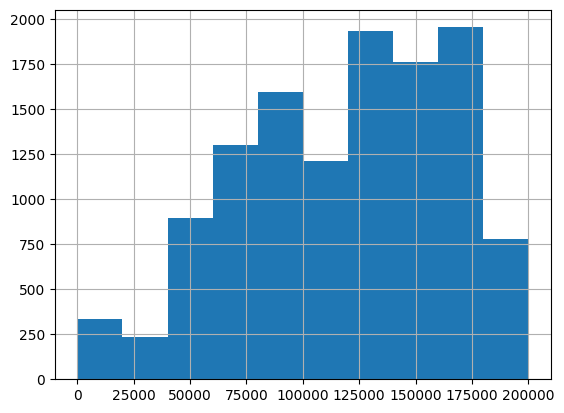

In [65]:
train_inputs['EstimatedSalary'].hist()

Використаємо MinMaxScaler, оскільки дані розподілені без викидів відносно рівномірно

In [66]:
scaler_EstimatedSalary = MinMaxScaler()
scaler_EstimatedSalary.fit(train_inputs[['EstimatedSalary']])
train_inputs[['EstimatedSalary']] = scaler_EstimatedSalary.transform(train_inputs[['EstimatedSalary']])
val_inputs[['EstimatedSalary']] = scaler_EstimatedSalary.transform(val_inputs[['EstimatedSalary']])

In [67]:
train_inputs[numeric_cols].describe().round(2)

,id,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,7509.94,0.00,37.71,0.50,0.39,0.79,0.49,0.59
std,4323.72,1.00,8.17,0.28,0.54,0.41,0.50,0.23
min,0.00,-3.16,18.00,0.00,0.00,0.00,0.00,0.00
25%,3769.75,-0.77,32.00,0.30,0.00,1.00,0.00,0.42
50%,7513.00,0.03,37.00,0.50,0.00,1.00,0.00,0.62
75%,11253.25,0.69,42.00,0.70,1.00,1.00,1.00,0.78
max,14999.00,2.64,74.00,1.00,1.91,1.00,1.00,1.00


Побудова пайплайнів

In [68]:
pd.set_option('display.max_columns', None)

In [69]:
train_inputs.head()

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CATEGORY,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,Age_CATEGORY_0-30,Age_CATEGORY_30-33,Age_CATEGORY_34-37,Age_CATEGORY_37-40,Age_CATEGORY_40-47,Age_CATEGORY_47+
4318,4318,Hsia,0.214950,France,Male,40.0,0.2,0.0,1.0,1.0,1.0,0.812638,37-40,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6010,6010,Lucciano,-0.754567,Spain,Male,44.0,0.4,0.0,2.0,1.0,0.0,0.429437,40-47,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10417,10417,Yobanna,0.104148,France,Male,31.0,0.1,0.0,1.0,1.0,1.0,0.584887,30-33,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9193,9193,Calabresi,1.267569,France,Female,36.0,0.8,0.0,2.0,0.0,1.0,0.904031,34-37,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14384,14384,Hsueh,0.713559,France,Female,33.0,0.6,0.0,2.0,1.0,0.0,0.778948,30-33,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
val_inputs.head()

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_CATEGORY,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,Age_CATEGORY_0-30,Age_CATEGORY_30-33,Age_CATEGORY_34-37,Age_CATEGORY_37-40,Age_CATEGORY_40-47,Age_CATEGORY_47+
1615,1615,Chiganu,0.353453,Spain,Male,26.0,0.3,0.000000,1.0,1.0,1.0,0.658868,0-30,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8054,8054,Atherton,0.242651,France,Female,28.0,0.3,1.186816,1.0,1.0,0.0,0.733355,0-30,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14467,14467,Yashina,0.699709,Spain,Male,38.0,0.4,0.000000,2.0,1.0,0.0,0.570415,37-40,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14124,14124,Lu,1.253719,France,Female,39.0,0.5,1.490430,1.0,1.0,0.0,0.737663,37-40,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12782,12782,Chinedum,-0.269809,France,Male,37.0,0.7,1.390483,1.0,0.0,1.0,0.539189,34-37,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [71]:
import os

In [72]:
!pip install pyarrow --quiet

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
os.getcwd()

'/content'

In [75]:
%cd /content/drive/My Drive/2025HP/03_Supervised_Learning/03-2-Classification-LogReg-Quality/2025-06-23 Логістична регресія Sklearn

/content/drive/My Drive/2025HP/03_Supervised_Learning/03-2-Classification-LogReg-Quality/2025-06-23 Логістична регресія Sklearn


In [76]:
os.makedirs('data', exist_ok=True)

# Зберігаємо у папку
train_inputs.to_parquet('data/train_inputs.parquet')
val_inputs.to_parquet('data/val_inputs.parquet')
train_targets.to_frame(name='target').to_parquet('data/train_targets.parquet')
val_targets.to_frame(name='target').to_parquet('data/val_targets.parquet')

# Перевірка
os.listdir('data')

['val_targets.parquet',
 'train_targets.parquet',
 'val_inputs.parquet',
 'train_inputs.parquet']

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [77]:
X_train = train_inputs
X_val = val_inputs

del X_train['id']
del X_val['id']

del X_train['Surname']
del X_val['Surname']

del X_train['Age']
del X_val['Age']

del X_train['Geography']
del X_train['Gender']
del X_train['NumOfProducts']
del X_train['Age_CATEGORY']
del X_train['Geography_Germany']
del X_train['Gender_Female']
del X_train['Age_CATEGORY_47+']
del X_train['NumOfProducts_4.0']


del X_val['Geography']
del X_val['Gender']
del X_val['NumOfProducts']
del X_val['Age_CATEGORY']
del X_val['Geography_Germany']
del X_val['Gender_Female']
del X_val['Age_CATEGORY_47+']
del X_val['NumOfProducts_4.0']


In [78]:
pd.set_option('display.max_columns', None)

In [79]:
X_train.head()

,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,Age_CATEGORY_0-30,Age_CATEGORY_30-33,Age_CATEGORY_34-37,Age_CATEGORY_37-40,Age_CATEGORY_40-47
4318,0.214950,0.2,0.0,1.0,1.0,0.812638,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6010,-0.754567,0.4,0.0,1.0,0.0,0.429437,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10417,0.104148,0.1,0.0,1.0,1.0,0.584887,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9193,1.267569,0.8,0.0,0.0,1.0,0.904031,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14384,0.713559,0.6,0.0,1.0,0.0,0.778948,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [80]:
X_val.head()

,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,Age_CATEGORY_0-30,Age_CATEGORY_30-33,Age_CATEGORY_34-37,Age_CATEGORY_37-40,Age_CATEGORY_40-47
1615,0.353453,0.3,0.000000,1.0,1.0,0.658868,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8054,0.242651,0.3,1.186816,1.0,0.0,0.733355,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14467,0.699709,0.4,0.000000,1.0,0.0,0.570415,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14124,1.253719,0.5,1.490430,1.0,0.0,0.737663,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12782,-0.269809,0.7,1.390483,0.0,1.0,0.539189,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression(solver='liblinear')

In [83]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [84]:
print(X_val.columns)

Index(['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_France', 'Geography_Spain', 'Gender_Male',
       'NumOfProducts_1.0', 'NumOfProducts_2.0', 'NumOfProducts_3.0',
       'Age_CATEGORY_0-30', 'Age_CATEGORY_30-33', 'Age_CATEGORY_34-37',
       'Age_CATEGORY_37-40', 'Age_CATEGORY_40-47'],
      dtype='object')


In [85]:
model.coef_.round(2)

array([[-0.15, -0.02, -1.  , -0.13, -1.2 ,  0.16, -1.76, -1.66, -0.75,
        -0.61, -3.36,  2.24, -3.74, -3.4 , -3.13, -2.4 , -1.24]])

In [86]:
print(model.coef_.tolist())

[[-0.1454622828180342, -0.01824034821387891, -1.0018007176276384, -0.12984897292347614, -1.2004448093851943, 0.16350163073018148, -1.7592542832733105, -1.6629840149657131, -0.7502465379291159, -0.6073326052346603, -3.3574539944084214, 2.2380576961383154, -3.7415366287152207, -3.395716135891936, -3.1318449274909117, -2.4036321573215234, -1.2375167532898583]]


In [87]:
print(model.intercept_)

[4.95107594]


In [88]:
train_preds = model.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
train_targets

,Exited
4318,1.0
6010,0.0
10417,0.0
9193,0.0
14384,0.0
...,...
8624,0.0
12884,0.0
14654,0.0
13404,0.0


In [90]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.85835952, 0.14164048],
       [0.88228989, 0.11771011],
       [0.94338022, 0.05661978],
       ...,
       [0.96705269, 0.03294731],
       [0.98969886, 0.01030114],
       [0.55672328, 0.44327672]])

In [91]:
np.argmax(train_probs, axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
np.argmax(train_probs, axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
import matplotlib.pyplot as plt

(array([7198., 1301.,  659.,  508.,  304.,  321.,  349.,  350.,  492.,
         518.]),
 array([5.46638253e-04, 1.00339354e-01, 2.00132070e-01, 2.99924786e-01,
        3.99717501e-01, 4.99510217e-01, 5.99302933e-01, 6.99095649e-01,
        7.98888364e-01, 8.98681080e-01, 9.98473796e-01]),
 <BarContainer object of 10 artists>)

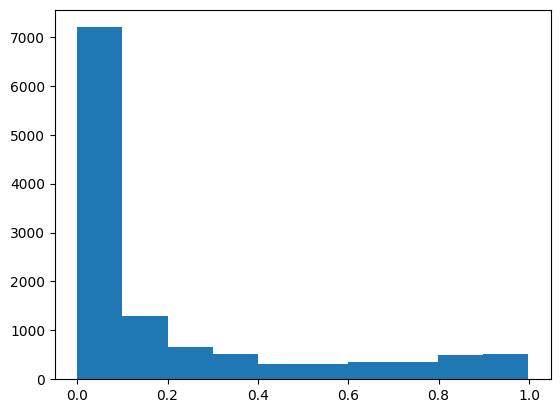

In [94]:
plt.hist(train_probs[:,1])

In [95]:
train_targets.value_counts(normalize=True)

,proportion
Exited,
0.0,0.7965
1.0,0.2035


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для
порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

# Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(train_targets, train_preds)

array([[9135,  423],
       [ 835, 1607]])

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(train_targets, train_preds)

0.8951666666666667

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 89.52%


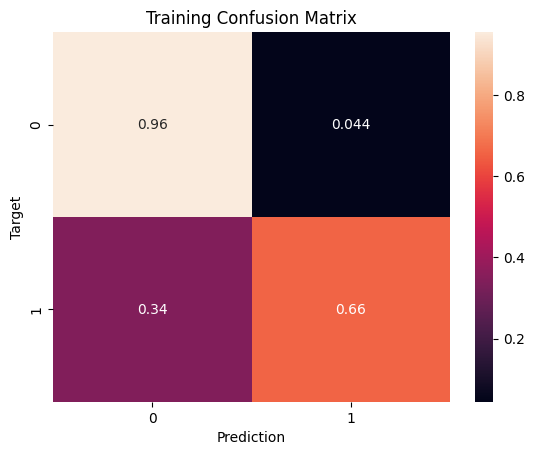

In [101]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 89.30%


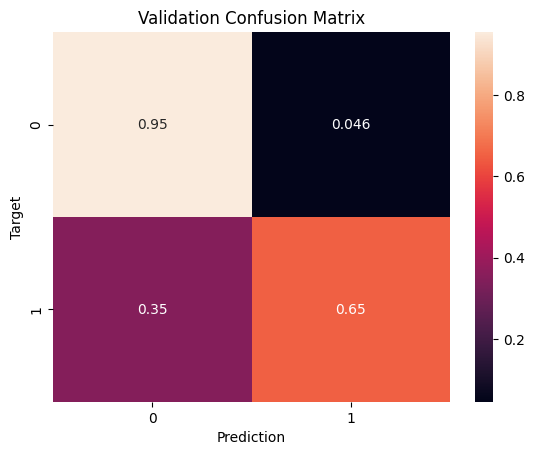

In [102]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

# F1 Score

In [103]:
from sklearn.metrics import f1_score

def get_f1_score(inputs, targets, name='', threshold=0.5):
    # Отримуємо ймовірності для класу 1
    probs = model.predict_proba(inputs)[:, 1]

    # Застосовуємо поріг
    preds = (probs >= threshold).astype(int)

    # Обчислюємо F1 score
    f1_score_ = f1_score(targets, preds, pos_label=1)
    print(f"F1 score {name}: {f1_score_:.2f}")

# Виклик функції
get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Training: 0.72
F1 score Validation: 0.71


# AUROC

In [104]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.93


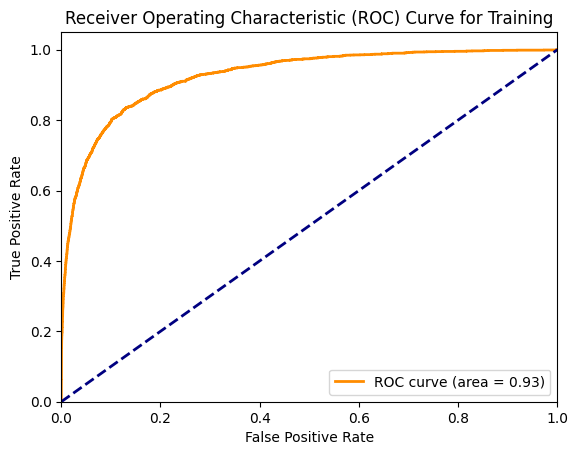

AUROC for Validation: 0.93


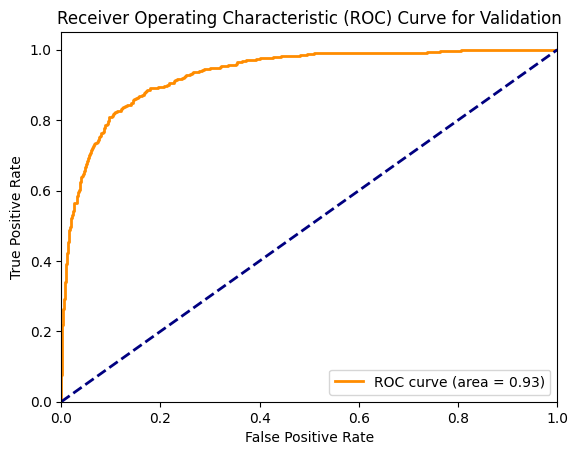

In [105]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

# Загальні висновки щодо якості моделі

**Здатність моделі розділяти класи:**  
- AUROC (площа під ROC-кривою) становить **0.93** на тренувальних та **0.92** на валідаційних даних.  
- Це свідчить про високу здатність моделі відрізняти позитивні та негативні класи.

**F1 Score:**  
- Значення **0.72** на тренувальних і валідаційних даних вказує на баланс між точністю та повнотою.  
- Проте Recall (повнота) для позитивного класу залишає простір для покращення.

**Матриця помилок показує:**  
- Більшість негативних випадків класифікуються коректно.  
- Частина позитивних випадків залишаються непоміченими (829 пропусків), що може бути суттєвим залежно від задачі.  
- Хибнопозитивних передбачень небагато (429 випадків).

**Стабільність:**  
- Однакові показники на тренувальних і валідаційних даних свідчать про відсутність переобучення.  

---

**Висновок:**  
Модель демонструє хорошу загальну якість і стабільність. Високий AUROC свідчить про ефективність моделі. Однак, для задач, де критично важливо не пропускати позитивні випадки, рекомендується додаткова оптимізація порогу класифікації або використання альтернативних моделей.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [106]:
train_targets.value_counts()

,count
Exited,
0.0,9558
1.0,2442


In [107]:
def all_zero(inputs):
    return np.full(len(inputs), 0)

In [108]:
accuracy_score(train_targets, all_zero(X_train))

0.7965

In [109]:
accuracy_score(val_targets, all_zero(X_val))

0.7966666666666666

In [110]:
accuracy_score(train_targets, train_preds)

0.8951666666666667

In [111]:
accuracy_score(val_targets, val_preds)

0.893

Ваша модель демонструє хорошу якість. Вона суттєво перевищує наївну мажоритарну модель за всіма ключовими метриками, стабільна як на тренувальних, так і на валідаційних даних.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [112]:
import joblib

In [113]:
log_reg_package = {
    'model': model,
    'encoder': encoder,
    'scalers': {
        'CreditScore': scaler_CreditScore,
        'Tenure': scaler_Tenure,
        'Balance': scaler_Balance
    },
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [114]:
# Збереження
joblib.dump(log_reg_package, 'log_reg.joblib')

# Завантаження
model_2 = joblib.load('log_reg.joblib')

In [115]:
train_preds2 = model_2['model'].predict(X_train)
accuracy_score(train_targets, train_preds)

0.8951666666666667

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [116]:
numeric_cols, categorical_cols

(['id',
  'CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography', 'Gender', 'NumOfProducts', 'Age_CATEGORY'])

In [117]:
def predict_raw_df(scalers, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    iinput_df = input_df.copy()

    # Видаляємо цільову змінну, якщо є
    if 'Exited' in iinput_df.columns:
      del iinput_df['Exited']
    if 'CustomerId' in iinput_df.columns:
      del iinput_df['CustomerId']

    # Категорія за віком
    iinput_df['Age_CATEGORY'] = iinput_df['Age'].apply(age_cat)

    # Приведення типів
    for a in categorical_cols:
      if a in iinput_df.columns.tolist():
        iinput_df[a] = iinput_df[a].astype('category')

    for b in numeric_cols:
      if b in iinput_df.columns.tolist():
        iinput_df[b] = iinput_df[b].astype(float)

    # Визначення списків колонок
    num_cols = iinput_df.select_dtypes(include=np.number).columns.tolist()
    cat_cols = iinput_df.select_dtypes(include=['object', 'category']).columns.tolist()
    cat_cols.remove('Surname')

    # Масштабування числових ознак
    for c in scalers:
      if c in num_cols:
        iinput_df[[c]] = scalers[c].transform(iinput_df[[c]])

    # Кодування категоріальних ознак
    encoded_array = encoder.transform(iinput_df[cat_cols])
    encoded_cols = encoder.get_feature_names_out(cat_cols)
    iinput_df[encoded_cols] = encoded_array

    # Видалення зайвих колонок
    cols_to_remove = [
      'id', 'Surname', 'Age', 'Geography', 'Gender', 'NumOfProducts',
      'Age_CATEGORY', 'Geography_Germany', 'Gender_Female', 'Age_CATEGORY_47+',
      'NumOfProducts_4.0'
      ]

    num_cols = [col for col in num_cols if col not in cols_to_remove]
    encoded_cols = [col for col in encoded_cols if col not in cols_to_remove]

    # Формування фінального датафрейму для моделі
    X_iinput = iinput_df[num_cols + list(encoded_cols)]

    # Повертаємо ймовірності
    prob = model.predict_proba(X_iinput)[:,1]
    return prob

In [118]:
probs = predict_raw_df(
    scalers={
        'CreditScore': scaler_CreditScore,
        'Tenure': scaler_Tenure,
        'Balance': scaler_Balance,
        'EstimatedSalary': scaler_EstimatedSalary
    },
    encoder=encoder,
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
    input_df=raw_df
)

In [119]:
np.unique(probs, return_counts=True)

(array([5.46638253e-04, 5.72560973e-04, 5.77128816e-04, ...,
        9.97629473e-01, 9.97717889e-01, 9.98473796e-01]),
 array([1, 1, 1, ..., 1, 1, 1]))

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [120]:
test_raw_df = pd.read_csv(test_csv)
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [121]:
test_raw_df['Exited'] = predict_raw_df(
    scalers={
        'CreditScore': scaler_CreditScore,
        'Tenure': scaler_Tenure,
        'Balance': scaler_Balance,
        'EstimatedSalary': scaler_EstimatedSalary
    },
    encoder=encoder,
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
    input_df=test_raw_df
)

In [122]:
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.073494
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,0.012306
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,0.094200
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.349281
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.041147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65,0.011097
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50,0.011088
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72,0.006494
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09,0.141910


In [123]:
test_raw_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,19999.50000,1.569344e+07,658.091500,37.882600,5.042000,42828.366454,1.585600,0.780300,0.481900,1.185294e+05,0.209392
std,2886.89568,7.155043e+04,72.168634,8.166143,2.797681,59904.661559,0.530943,0.414064,0.499697,7.558253e+04,0.290275
min,15000.00000,1.556588e+07,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.477300e+02,0.000531
25%,17499.75000,1.563539e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,8.341915e+04,0.014515
50%,19999.50000,1.569083e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,1.229254e+05,0.058309
75%,22499.25000,1.575941e+07,708.000000,42.000000,7.000000,109927.335000,2.000000,1.000000,1.000000,1.557898e+05,0.282087
max,24999.00000,1.581566e+07,850.000000,74.000000,11.000000,186788.960000,4.000000,1.000000,1.000000,6.090906e+06,0.997926


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [124]:
submission_log_reg_raw_df = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-3/sample_submission.csv')
submission_log_reg_raw_df.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [125]:
submission_log_reg_raw_df = submission_log_reg_raw_df.set_index('id')
test_raw_df = test_raw_df.set_index('id')

submission_log_reg_raw_df['Exited'] = test_raw_df['Exited']

submission_log_reg_raw_df = submission_log_reg_raw_df.reset_index()
submission_log_reg_raw_df

,id,Exited
0,15000,0.073494
1,15001,0.012306
2,15002,0.094200
3,15003,0.349281
4,15004,0.041147
...,...,...
9995,24995,0.011097
9996,24996,0.011088
9997,24997,0.006494
9998,24998,0.141910


In [126]:
submission_log_reg_raw_df.to_csv('bank-customer-churn-prediction-dlu-course-c-3/submission_log_reg_2025-07-01-2.csv', index=False)